# Merge webpage info from HIFLDS data set into hospital data set

In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from tqdm import tqdm
import matplotlib.pyplot as plt

In [43]:
hospital = pd.read_csv("../../data/hospital_level_info/02_hospital_info.csv")
hospital_new = pd.read_csv("../../intermediate/03_hospital_level_info_merged.csv")
hospital_full =pd.read_csv("../../intermediate/04_hospital_level_info_merged_with_website.csv")
hospital_sam = pd.read_excel("../../data/hospital_level_info/05_tbl_usr_rpt_5103.xlsx")
ventilators = pd.read_csv("ventilator_state_wise.txt", delimiter=' ', names = ['State', 'MVNum', 'MV per 100k', 'Ped MVNum', 'Ped MV per 100k'])
state_code = pd.read_csv("state_code.txt", delimiter='\t', names=['State', 'Code'])

In [361]:
hospital_full.keys()[hospital_full.keys().str.contains('Registered')]

Index(['Registered Nurses'], dtype='object')

In [347]:
hospital_full.keys()[hospital_full.keys().str.contains('ICU Beds')], hospital_full.keys()[hospital_full.keys().str.contains('ICU Beds')]

(Index(['Total Acute Beds', 'Total Staffed Beds', 'General Med/Surg Beds',
        'ICU Beds', 'Med/Surg Beds', 'Coronary ICU Beds',
        'Burn Intensive Care Beds', 'Surgical ICU Beds', 'Psych ICU Beds',
        'Pediatric ICU Beds', 'Neonatal ICU Beds', 'Trauma ICU Beds',
        'Detox ICU Beds', 'Premature ICU Beds', 'Psychiatric Unit Beds',
        'Rehabilitation Unit Beds', 'SNF Unit Beds', 'NF Unit Beds',
        'Other Subprovider Unit Beds', 'Total Beds',
        'Swing Beds SNF Days Total', 'Swing Beds NF Days Total'],
       dtype='object'),
 Index(['ICU Beds', 'Coronary ICU Beds', 'Surgical ICU Beds', 'Psych ICU Beds',
        'Pediatric ICU Beds', 'Neonatal ICU Beds', 'Trauma ICU Beds',
        'Detox ICU Beds', 'Premature ICU Beds'],
       dtype='object'))

In [337]:
hospital_full["County Name_y"].unique()

array(['HOUSTON', 'MARSHALL', 'LAUDERDALE', ..., 'SAN PATRICIO',
       'GUAYNABO', 'NORTHUMBERLND'], dtype=object)

In [368]:
for key in hospital_full.keys():
    print(key)

Unnamed: 0
CMS Certification Number
Facility Name_x
Street Address_x
City_x
State_x
ZIP
System Affiliation
Type of Facility
Total Employees
Urban or Rural Designation
Latitude
Longitude
Total Acute Beds
Total Staffed Beds
General Med/Surg Beds
ICU Beds
ICU Occupancy Rate
Acute Occupancy Rate
Staffed Occupancy Rate
Registered Nurses
CBSA Title
County Name_x
FY End Date
Months in Reporting Period
Total Discharges
Total Average Length of Stay
Total Average Daily Census
5A1935Z Cases
5A1935Z Occurrences
5A1935Z Days
5A1945Z Cases
5A1945Z Occurrences
5A1945Z Days
5A1955Z Cases
5A1955Z Occurrences
5A1955Z Days
Med/Surg Beds
Coronary ICU Beds
Burn Intensive Care Beds
Surgical ICU Beds
Psych ICU Beds
Pediatric ICU Beds
Neonatal ICU Beds
Trauma ICU Beds
Detox ICU Beds
Premature ICU Beds
Psychiatric Unit Beds
Rehabilitation Unit Beds
SNF Unit Beds
NF Unit Beds
Other Subprovider Unit Beds
Total Beds
Med/Surg Days
ICU Days
Coronary ICU Total Days
Burn Intensive Care Total Days
Surgical ICU Days To

In [385]:
# hospital_full[hospital_full.State=='CA'].groupby(["County Name_y"], 
#                       as_index=False)[hospital_full.keys()[hospital_full.keys().str.contains(
#     'ICU Beds')]].agg('sum')
hospital_full[hospital_full["Facility Name_x"].apply(lambda x: 
                                                     'Montefiore' in str(x)) ][[
    "CMS Certification Number", "State", "County Name_y", "System Affiliation",
    
    "Facility Name_x", "Type of Facility", "Hospital Type", "Hospital Ownership",
    "ICU Beds", "Total Employees",
                                                        "Registered Nurses", ]]
# [hospital_full.keys()[hospital_full.keys().str.contains(
#            'ICU Beds')]]

,CMS Certification Number,State,County Name_y,System Affiliation,Facility Name_x,Type of Facility,Hospital Type,Hospital Ownership,ICU Beds,Total Employees,Registered Nurses
3736,330059,NY,BRONX,"Montefiore Health System - Bronx, NY",Montefiore Hospital- Moses Campus,Short Term Acute Care,Acute Care Hospitals,Voluntary non-profit - Private,54.0,18142.0,2522.0
3741,330072,NaN,NaN,"Montefiore Health System - Bronx, NY",Montefiore Wakefield Campus,Short Term Acute Care,NaN,NaN,16.0,1769.0,367.0
3749,330086,NY,WESTCHESTER,"Montefiore Health System - Bronx, NY",Montefiore Mount Vernon Hospital,Short Term Acute Care,Acute Care Hospitals,Voluntary non-profit - Private,0.0,462.0,85.0
3760,330104,NaN,ROCKLAND,"Montefiore Health System - Bronx, NY",Montefiore Nyack Hospital,Short Term Acute Care,Acute Care Hospitals,Voluntary non-profit - Other,0.0,1276.0,326.0
3801,330184,NY,WESTCHESTER,"Montefiore Health System - Bronx, NY",Montefiore New Rochelle Hospital,Short Term Acute Care,Acute Care Hospitals,Voluntary non-profit - Private,12.0,998.0,4.0
3848,330264,NaN,ORANGE,"Montefiore Health System - Bronx, NY",Montefiore St. Lukes Cornwall,Short Term Acute Care,Acute Care Hospitals,Voluntary non-profit - Other,18.0,1017.0,280.0
3862,330316,NaN,NaN,"Montefiore Health System - Bronx, NY",Montefiore Westchester Square Campus,Short Term Acute Care,NaN,NaN,10.0,85.0,168.0
6442,,NaN,NaN,"Montefiore Health System - Bronx, NY",The Children's Hospital at Montefiore,Childrens,NaN,NaN,0.0,0.0,0.0
6683,,NaN,NaN,University of Pittsburgh Medical Center (UPMC)...,UPMC Montefiore,Short Term Acute Care,NaN,NaN,0.0,0.0,0.0


In [374]:
hospital_full[hospital_full["Facility Name_x"].apply(lambda x: 
                                                     'Jamaica' in str(x)) ][hospital_full.keys()[hospital_full.keys().str.contains(
           'Beds')]]

,Total Acute Beds,Total Staffed Beds,General Med/Surg Beds,ICU Beds,Med/Surg Beds,Coronary ICU Beds,Burn Intensive Care Beds,Surgical ICU Beds,Psych ICU Beds,Pediatric ICU Beds,...,Detox ICU Beds,Premature ICU Beds,Psychiatric Unit Beds,Rehabilitation Unit Beds,SNF Unit Beds,NF Unit Beds,Other Subprovider Unit Beds,Total Beds,Swing Beds SNF Days Total,Swing Beds NF Days Total
2654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3717,285.0,594.0,240.0,19.0,240.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,56.0,22.0,231.0,0.0,0.0,594.0,0.0,0.0


## ICU Occupnacy Raten

In [346]:
hospital_full[(hospital_full['County Name_y'].isin(['SONOMA', 'NAPA', 'SOLANO', 'MARIN', 'CONTRA COSTA', 'ALAMEDA', 'SANTA CLARA', 'SAN FRANCISCO', 'SAN MATEO']))
              & (hospital_full['State']=='CA')][hospital_full.keys()[hospital_full.keys().str.contains('ICU Beds')]].sum().sum()


1427.0

In [ ]:
hospital_full

In [345]:
hospital_full[(hospital_full['State']=='CA')][hospital_full.keys()[hospital_full.keys().str.contains('ICU Beds')]].sum().sum()


7104.0

In [228]:
hospital_full[hospital_full["Facility Name_x"].apply(lambda x: 
                                                     'Kaise' in str(x)) ][["Facility Name_x", 
                                                "Hospital Name",
                                                                             'ICU Occupancy Rate', 'Acute Occupancy Rate', 'Staffed Occupancy Rate',
       'Med/Surg Occupancy Rate', 'Coronary ICU Occupancy Rate',
       'Burn Intensive Care Occupancy Rate', 'Surgical ICU Occupancy Rate',
       'Psych ICU Occupancy Rate',]]

,Facility Name_x,Hospital Name,ICU Occupancy Rate,Acute Occupancy Rate,Staffed Occupancy Rate,Med/Surg Occupancy Rate,Coronary ICU Occupancy Rate,Burn Intensive Care Occupancy Rate,Surgical ICU Occupancy Rate,Psych ICU Occupancy Rate
398,Kaiser Permanente South San Francisco Medical ...,Kfh - South San Francisco,40.712329,45.372146,45.372146,46.037834,0.0,0.0,0.0,0.0
403,Kaiser Permanente San Francisco Medical Center,Kfh - San Francisco,58.249620,67.220726,67.220726,61.634950,0.0,0.0,0.0,0.0
570,Kaiser Permanente Zion Medical Center,Kfh - San Diego,60.042808,54.970354,54.970354,48.764816,0.0,0.0,0.0,0.0
663,Kaiser Permanente Roseville Medical Center,Kfh - Roseville,73.273621,75.325544,75.325544,65.651992,0.0,0.0,0.0,0.0
789,Kaiser Permanente Behavioral Health Center in ...,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1431,Kaiser Permanente Moanalua Medical Center & Cl...,Kfh-Hawaii,60.197515,64.136522,64.136522,61.764514,0.0,0.0,0.0,0.0
4556,Kaiser Sunnyside Medical Center,Kaiser Sunnyside Medical Center,48.164384,58.978499,58.978499,57.384807,0.0,0.0,0.0,0.0
4558,Kaiser Permanente Westside Medical Center,Kaiser Westside Medical Center,37.972603,44.821469,44.821469,39.210314,0.0,0.0,0.0,0.0
5523,Otto Kaiser Memorial Hospital,NaN,0.000000,6.104110,15.967123,6.104110,0.0,0.0,0.0,0.0
6911,Kaiser Permanente San Diego Medical Center,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [255]:
import seaborn as sns

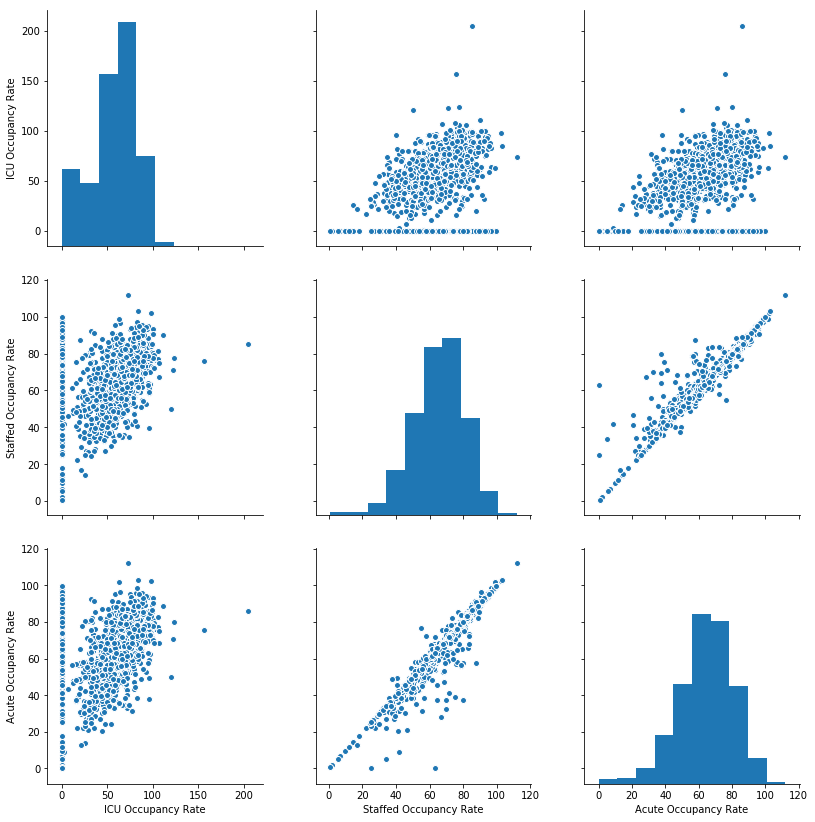

In [278]:
# plt.figure(figsize=[12, 4])
df = hospital_full[['ICU Occupancy Rate', 'Staffed Occupancy Rate', 'Acute Occupancy Rate', 'State']].dropna()
g = sns.pairplot(data=df, vars=['ICU Occupancy Rate', 'Staffed Occupancy Rate', 'Acute Occupancy Rate'], diag_kind='hist')
g.fig.set_size_inches(12,12)

plt.show()

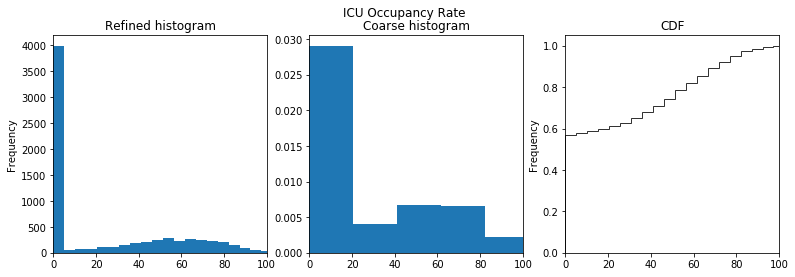

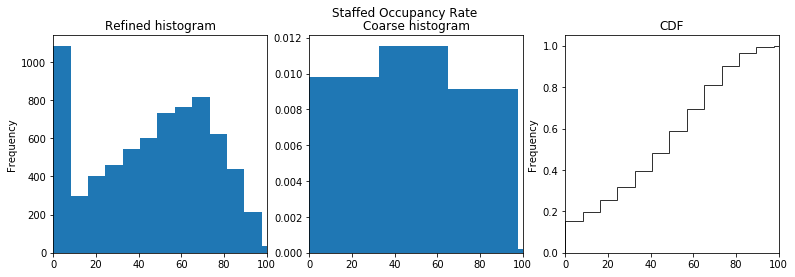

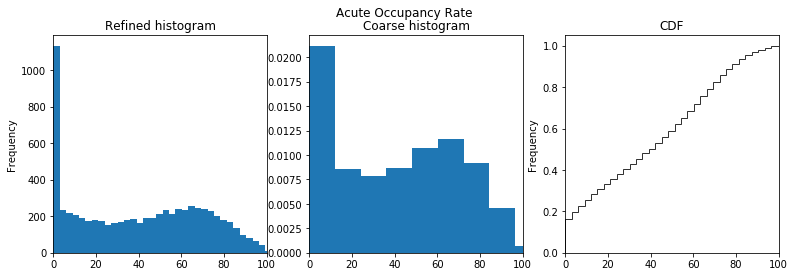

In [276]:
for f in ['ICU Occupancy Rate', 'Staffed Occupancy Rate', 'Acute Occupancy Rate']:
    plt.figure(figsize=[13, 4])
    plt.subplot(131)
    hospital_full[f].plot.hist( bins=40)
    plt.title('Refined histogram')
    plt.xlim([0, 100])
    plt.subplot(132)
    hospital_full[f].plot.hist(density=True, bins=10)
    plt.title('Coarse histogram')
    plt.ylabel('')
    plt.xlim([0, 100])
    plt.subplot(133)
    hospital_full[f].plot.hist(density=True, bins=40, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='k')
    plt.title('CDF')
    plt.xlim([0, 100])
    plt.suptitle(f)
    plt.show()

# hospital_full[].plot.hist(density=True, bins=40, cumulative=True, label='CDF',
#          histtype='step', alpha=0.8, color='k')
# plt.xlim([0, 100])
# plt.show()

# hospital_full['Acute Occupancy Rate'].plot.hist(density=True, bins=40, cumulative=True, label='CDF',
#          histtype='step', alpha=0.8, color='k')
# plt.xlim([0, 100])
# plt.show()

In [230]:
hospital_full[hospital_full["Facility Name_x"].apply(lambda x: 
                                                     'Elmhurst' in str(x)) ][["Facility Name_x", 
                                                "Hospital Name", 'Address', 
                                                                             'ICU Occupancy Rate', 'Acute Occupancy Rate', 'Staffed Occupancy Rate',
'Total Acute Beds', 'Total Staffed Beds', 'General Med/Surg Beds',
       'ICU Beds',
                                                                              'Med/Surg Occupancy Rate', 'Coronary ICU Occupancy Rate',
       'Burn Intensive Care Occupancy Rate', 'Surgical ICU Occupancy Rate',
       'Psych ICU Occupancy Rate',]]

,Facility Name_x,Hospital Name,Address,ICU Occupancy Rate,Acute Occupancy Rate,Staffed Occupancy Rate,Total Acute Beds,Total Staffed Beds,General Med/Surg Beds,ICU Beds,Med/Surg Occupancy Rate,Coronary ICU Occupancy Rate,Burn Intensive Care Occupancy Rate,Surgical ICU Occupancy Rate,Psych ICU Occupancy Rate
1601,Elmhurst Hospital,NaN,155 EAST BRUSH HILL ROAD,79.475538,67.939376,67.939376,282.0,282.0,247.0,35.0,59.485331,0.000000,0.0,0.0,0.0
3773,NYC Health + Hospitals Elmhurst,Elmhurst Hospital Center,79-01 BROADWAY,32.821918,82.299686,80.344657,358.0,500.0,299.0,20.0,89.611948,69.649924,0.0,0.0,0.0


In [221]:
hospital_full[hospital_full["Facility Name_x"].str.contains('Elmhurst')]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [179]:
hospital_full.TIN.value_counts().value_counts(sort=True)

1     1094
2       37
3       13
4        8
5        5
32       1
17       1
13       1
12       1
6        1
Name: TIN, dtype: int64

In [182]:
hospital_full[hospital_full["Facility Name_x"].apply(lambda x: 'Kaiser' in str(x)) ][["CMS Certification Number", "TIN", "Facility Name_x", "Hospital Name"]]

,CMS Certification Number,TIN,Facility Name_x,Hospital Name
398,050070,941105628.0,Kaiser Permanente South San Francisco Medical ...,Kfh - South San Francisco
403,050076,941105628.0,Kaiser Permanente San Francisco Medical Center,Kfh - San Francisco
570,050515,941105628.0,Kaiser Permanente Zion Medical Center,Kfh - San Diego
663,050772,941105628.0,Kaiser Permanente Roseville Medical Center,Kfh - Roseville
789,054150,NaN,Kaiser Permanente Behavioral Health Center in ...,NaN
1431,120011,941105628.0,Kaiser Permanente Moanalua Medical Center & Cl...,Kfh-Hawaii
4556,380091,941105628.0,Kaiser Sunnyside Medical Center,Kaiser Sunnyside Medical Center
4558,380103,941105628.0,Kaiser Permanente Westside Medical Center,Kaiser Westside Medical Center
5523,451364,NaN,Otto Kaiser Memorial Hospital,NaN
6911,,NaN,Kaiser Permanente San Diego Medical Center,NaN


In [165]:
hospital_full["Facility Name_x"].str.contains('UCSF')

0       False
1       False
2       False
3       False
4       False
        ...  
7138      NaN
7139      NaN
7140      NaN
7141      NaN
7142      NaN
Name: Facility Name_x, Length: 7143, dtype: object

## ICU Beds / Nurses / Employees

In [184]:
# hospital_full[hospital_full["icu_beds/nurses"]>1]["Registered Nurses"].value_counts()

In [185]:
# hospital_full[hospital_full["nurses/total_employees"]>1]["Registered Nurses"].value_counts()

In [219]:
hospital_full["Registered Nurses"].sum()

1212488.0

In [218]:
hospital_full["Total Employees"].sum()

5134752.0

In [279]:
state_code

,State,Code
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,DC,DC
9,Florida,FL


In [118]:
hospital_full["icu_beds/nurses"] = hospital_full["ICU Beds"] / (1+hospital_full["Registered Nurses"])
hospital_full["nurses/total_employees"] =  hospital_full["Registered Nurses"] / (1+hospital_full["Total Employees"])
hospital_full["nurses/total_employees"]

In [136]:
state_level_data = hospital_full.groupby(['State']).agg(
        num_hospitals = pd.NamedAgg(column='Hospital Name', aggfunc='count'),
        total_icu_beds = pd.NamedAgg(column='ICU Beds', aggfunc='sum'),
        total_nurses = pd.NamedAgg(column='Registered Nurses', aggfunc='sum'),
        total_employees = pd.NamedAgg(column='Total Employees', aggfunc='sum'),
        mean_bn_ratio = pd.NamedAgg(column='icu_beds/nurses', aggfunc=np.mean),
        mean_ne_ratio = pd.NamedAgg(column='nurses/total_employees', aggfunc=np.mean),
    ).reset_index()
state_level_data["nurse/emply"] = state_level_data["total_nurses"] / state_level_data["total_employees"]
state_level_data["beds/nurse"] = state_level_data["total_icu_beds"] / state_level_data["total_nurses"]
state_level_data["nurse/hosp"] = state_level_data["total_nurses"] / state_level_data["num_hospitals"]

In [141]:
state_level_data.sort_values('num_hospitals', ascending=False)

,State,num_hospitals,total_icu_beds,total_nurses,total_employees,mean_bn_ratio,mean_ne_ratio,nurse/emply,beds/nurse,nurse/hosp
4,CA,127,4187.0,54746.0,258437.0,2.960838,0.247010,0.211835,0.076480,431.070866
34,NY,122,3082.0,69000.0,371715.0,0.063776,1.211485,0.185626,0.044667,565.573770
38,PA,83,2161.0,39154.0,172422.0,0.560899,0.262440,0.227082,0.055192,471.734940
44,TX,78,3516.0,54808.0,206999.0,0.721360,0.294748,0.264774,0.064151,702.666667
35,OH,72,1961.0,36500.0,181669.0,0.590336,0.280383,0.200915,0.053726,506.944444
9,FL,70,2976.0,37264.0,166987.0,2.026367,6.204310,0.223155,0.079863,532.342857
14,IL,63,1843.0,27819.0,121749.0,0.080569,0.267642,0.228495,0.066250,441.571429
22,MI,60,1915.0,30548.0,151301.0,0.083298,0.912971,0.201902,0.062688,509.133333
31,NJ,45,1159.0,21209.0,97020.0,0.086959,0.219274,0.218604,0.054647,471.311111
19,MA,37,891.0,18497.0,109801.0,0.049746,0.196586,0.168459,0.048170,499.918919


## Deaths

In [4]:
# Ratio of MV to adult ICU beds 52 118 .958 62 433 24 204 28 994
# Ratio of MV to total ICU beds* 52 118 .703 62 188 24 204 28 881
# Ratio of MV to staffed hospital beds 52 118 .072

In [44]:
ventilators = pd.read_csv("ventilator_state_wise.txt", delimiter=' ', names=["State", "MVNum", 'MV per 100k', 'PedMVNum', 'PedMV per 100k']) 
# downloaded from Table1 1 
# https://www.cambridge.org/core/services/aop-cambridge-core/content/view/F1FDBACA53531F2A150D6AD8E96F144D/S1935789300002731a.pdf/mechanical_ventilators_in_us_acute_care_hospitals.pdf

ventilators["Extra MVNum"] = np.around(ventilators["MVNum"] /ventilators["MVNum"].sum() * 98738)
ventilators["Total MVNum"] = ventilators["MVNum"] + ventilators["Extra MVNum"]
ventilators["Total MV per 100k"] = ventilators["Total MVNum"] * ventilators['MV per 100k'] / ventilators["MVNum"]
ventilators["State Full"] = ventilators["State"]
ventilators = pd.merge(ventilators, state_code, 'outer')
ventilators["State"] = ventilators["Code"]

del ventilators["Code"]
state_tests_data = pd.read_csv("testing_stats.txt", delimiter='\t') 
state_tests_data = state_tests_data.fillna({'Death':0})
# downloaded from https://covidtracking.com/data

ventilators = pd.merge(ventilators, state_tests_data, 'outer')
for f in ['Positive', 'Negative', 'Pending', 'Hospitalized', 'Total']: # fixing the string problem
    array = []
    for numeric_string in ventilators[f]:
        try:
            temp = int(str(numeric_string).replace(',', ''))
        except:
            temp = np.NaN
        array.append(temp)
    ventilators[f] = array
    
state_info = hospital_full.groupby(['State'], as_index=False)['ICU Beds','Registered Nurses', 'Total Employees'].agg('sum')
ventilators = pd.merge(ventilators, state_info, 'outer')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [46]:
print(ventilators.keys())
ventilators = ventilators.rename(columns={'Total': 'total_tests', 'Registered Nurses': 'registered_nurses', 
                                          'Total Employees': 'total_employees' })
print(ventilators.keys())

Index(['State', 'MVNum', 'MV per 100k', 'PedMVNum', 'PedMV per 100k',
       'Extra MVNum', 'Total MVNum', 'Total MV per 100k', 'State Full',
       'Positive', 'Negative', 'Pending', 'Hospitalized', 'Death',
       'total_tests', 'Last update (ET)', 'Check time (ET)', 'ICU Beds',
       'Registered Nurses', 'Total Employees'],
      dtype='object')
Index(['State', 'MVNum', 'MV per 100k', 'PedMVNum', 'PedMV per 100k',
       'Extra MVNum', 'Total MVNum', 'Total MV per 100k', 'State Full',
       'Positive', 'Negative', 'Pending', 'Hospitalized', 'Death',
       'total_tests', 'Last update (ET)', 'Check time (ET)', 'ICU Beds',
       'registered_nurses', 'total_employees'],
      dtype='object')


In [194]:
cd.total_positive_cases.sum()

102302.0

In [285]:
cases = pd.read_csv("../../data/usafacts/confirmed_cases.csv")
deaths = pd.read_csv("../../data/usafacts/deaths.csv")
cases = cases.rename(columns={"County Name": "county", '3/27/2020': "total"})
deaths = deaths.rename(columns={"County Name": "county", '3/27/2020': "total"})
cases.sort_values('total', ascending=False)[:20]["county"].values

cd = pd.merge(cases, deaths, 'outer', on=['State', 'county', 'countyFIPS', 'stateFIPS'], suffixes=['_positive_cases', '_deaths'])

cd[['State', 'total_positive_cases', 'total_deaths']].sort_values(['total_positive_cases'], ascending=False)[:20]

,State,total_positive_cases,total_deaths
1700,NY,8214.0,149.0
1719,NY,7187.0,10.0
1683,NY,6750.0,102.0
1689,NY,4657.0,27.0
1662,NY,4655.0,101.0
1690,NY,4478.0,65.0
1711,NY,3386.0,30.0
412,IL,2239.0,20.0
31,NJ,1984.0,16.0
2893,WA,1828.0,125.0


In [304]:
hospital_full.State

0        AL
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7138     PA
7139     PA
7140     RI
7141     TX
7142     TX
Name: State, Length: 7143, dtype: object

In [308]:
hospital_full.City_x

0         Dothan
1           Boaz
2       Florence
3            Opp
4        Luverne
          ...   
7138         NaN
7139         NaN
7140         NaN
7141         NaN
7142         NaN
Name: City_x, Length: 7143, dtype: object

In [310]:
hospital_full[hospital_full.City_x == 'Newyork City']

,Unnamed: 0,CMS Certification Number,Facility Name_x,Street Address_x,City_x,State_x,ZIP,System Affiliation,Type of Facility,Total Employees,...,Zip Code,Street Address 1,Street Address 2,City.1,State.1,Zip Code.1,Facility ID_y,Website,icu_beds/nurses,nurses/total_employees


In [303]:
hospital_full[(hospital_full.State == 'NY')& (hospital_full.City_x == 'New York City')]

,Unnamed: 0,CMS Certification Number,Facility Name_x,Street Address_x,City_x,State_x,ZIP,System Affiliation,Type of Facility,Total Employees,...,Zip Code,Street Address 1,Street Address 2,City.1,State.1,Zip Code.1,Facility ID_y,Website,icu_beds/nurses,nurses/total_employees


In [ ]:
cd[cd["State"]=="NY" & cd[""]].county.unique()

In [298]:
cd[cd["State"]=="NY"].county.unique()

array(['New York City Unallocated', 'Statewide Unallocated',
       'Albany County', 'Allegany County', 'Bronx County',
       'Broome County', 'Cattaraugus County', 'Cayuga County',
       'Chautauqua County', 'Chemung County', 'Chenango County',
       'Clinton County', 'Columbia County', 'Cortland County',
       'Delaware County', 'Dutchess County', 'Erie County',
       'Essex County', 'Franklin County', 'Fulton County',
       'Genesee County', 'Greene County', 'Hamilton County',
       'Herkimer County', 'Jefferson County', 'Kings County',
       'Lewis County', 'Livingston County', 'Madison County',
       'Monroe County', 'Montgomery County', 'Nassau County',
       'New York County', 'Niagara County', 'Oneida County',
       'Onondaga County', 'Ontario County', 'Orange County',
       'Orleans County', 'Oswego County', 'Otsego County',
       'Putnam County', 'Queens County', 'Rensselaer County',
       'Richmond County', 'Rockland County', 'St. Lawrence County',
       'Sara

In [286]:
state_data = cd.groupby(['State'], as_index=False).agg(sum)
state_data = pd.merge(state_data, ventilators, 'outer')
state_data["death_rate_them"] = np.around(100*state_data["Death"] / state_data["Positive"], 2)
state_data["death_rate_ours"] = np.around(100*state_data["total_deaths"] / state_data["total_positive_cases"], 2)
state_data["done_cases"] = state_data["Positive"] + state_data["Negative"]

In [287]:
state_data["positive_rate_them"] =  np.around(100*state_data["Positive"] / state_data["done_cases"], 2)
state_data["hospitalized_rate_them"] =  np.around(100*state_data["Hospitalized"] / state_data["done_cases"], 2)

In [289]:
state_data.total_positive_cases.sum()

102269.0

,State,Code
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,DC,DC
9,Florida,FL


In [294]:
print(len(state_data[["State", 'total_positive_cases']].sort_values('total_positive_cases', ascending=False)))

57


In [68]:

state_data["nurse/employees"] = state_data["registered_nurses"] / state_data["total_employees"]
state_data["ICU Beds/nurse"] = state_data["ICU Beds"] / state_data["registered_nurses"]
state_data[["ICU Beds", "registered_nurses", "total_employees", "ICU Beds/nurse", "nurse/employees"]].describe()

plt.hist(state_data["nurse/employees"].dropna())
plt.show()
plt.hist(state_data["ICU Beds/nurse"].dropna())
plt.show()

,ICU Beds,registered_nurses,total_employees,ICU Beds/nurse,nurse/employees
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,870.673077,14795.403846,61293.346154,0.064988,0.253538
std,924.239056,17124.968048,72032.649653,0.029229,0.138026
min,29.000000,714.000000,2612.000000,0.011288,0.147938
25%,257.750000,3677.750000,16676.000000,0.047959,0.200829
50%,598.500000,7961.000000,37774.500000,0.062993,0.225966
75%,1064.500000,17126.000000,64927.000000,0.076515,0.257298
max,4187.000000,72911.000000,371715.000000,0.207650,1.133584


In [14]:
state_data_small = state_data[['State', 'State Full','ICU Beds', 'MVNum', 'Positive', 'Negative', 'Pending', 'Hospitalized', 'done_cases',
                               'positive_rate_them', 'hospitalized_rate_them',
       'Death', 'death_rate_them', 'total_tests', 'total_positive_cases', 'total_deaths', "death_rate_ours", ]]

In [204]:
state_data.iloc[1, 69:135]

1/22/2020_deaths    0
1/23/2020_deaths    0
1/24/2020_deaths    0
1/25/2020_deaths    0
1/26/2020_deaths    0
                   ..
3/23/2020_deaths    0
3/24/2020_deaths    0
3/25/2020_deaths    1
3/26/2020_deaths    1
total_deaths        2
Name: 1, Length: 66, dtype: object

In [202]:
def find_idx(row_idxs, thres=1, case_death='death'):
    if case_death == 'death':
        offset = np.where(state_data.iloc[row_idxs, 68:132] >= thres )[0][0]
        start = 69 + offset
        end = 136
    elif case_death == 'case':
        offset = np.where(state_data.iloc[row_idxs, 3:67] >= thres )[0][0] 
        start = 3 + offset
        end = 69
    else:
        return('Error')
    return(start, end, offset)
    
    
def find_data(row_idxs, thres=1, case_death='death'):
    start, end = find_idx(row_idxs, thres, case_death)
    col_idxs = np.arange(start, end)
    return(state_data.iloc[row_idxs, np.arange(start, end)])

In [187]:
state_data_small[['State',  'Positive', 'Hospitalized', 'Death', 'death_rate_them', 'positive_rate_them', 'hospitalized_rate_them', 'done_cases', 
                  'total_tests','total_positive_cases', 'total_deaths', "death_rate_ours", 'ICU Beds', 'MVNum',]].sort_values(['positive_rate_them'], ascending=True)[:20]

,State,Positive,Hospitalized,Death,death_rate_them,positive_rate_them,hospitalized_rate_them,done_cases,total_tests,total_positive_cases,total_deaths,death_rate_ours,ICU Beds,MVNum
32,NM,112.0,NaN,1.0,0.89,1.44,NaN,7793.0,7793.0,112.0,0.0,0.00,172.0,366.0
11,HI,95.0,5.0,0.0,0.00,2.13,0.11,4452.0,4452.0,101.0,0.0,0.00,157.0,241.0
41,SD,46.0,NaN,1.0,2.17,2.28,NaN,2019.0,2144.0,41.0,1.0,2.44,94.0,149.0
28,ND,52.0,10.0,0.0,0.00,2.49,0.48,2091.0,2091.0,45.0,0.0,0.00,154.0,NaN
23,MN,346.0,41.0,2.0,0.58,2.67,0.32,12950.0,12950.0,287.0,1.0,0.35,823.0,811.0
0,AK,59.0,3.0,1.0,1.69,3.17,0.16,1860.0,1860.0,59.0,1.0,1.69,46.0,104.0
26,MT,71.0,1.0,0.0,0.00,3.23,0.05,2199.0,2199.0,65.0,0.0,0.00,148.0,158.0
30,NH,137.0,19.0,1.0,0.73,4.37,0.61,3138.0,3850.0,137.0,1.0,0.73,97.0,207.0
21,ME,155.0,NaN,0.0,0.00,4.37,NaN,3549.0,3549.0,142.0,0.0,0.00,155.0,214.0
29,NE,73.0,NaN,0.0,0.00,4.41,NaN,1657.0,1657.0,67.0,0.0,0.00,431.0,466.0


(array([ 2.,  0.,  0.,  3.,  1.,  2.,  3.,  1.,  3.,  4., 11.,  2.,  5.,
         3.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([-1. ,  0.1,  1.2,  2.3,  3.4,  4.5,  5.6,  6.7,  7.8,  8.9, 10. ,
        11.1, 12.2, 13.3, 14.4, 15.5, 16.6, 17.7, 18.8, 19.9, 21. , 22.1,
        23.2, 24.3, 25.4, 26.5, 27.6, 28.7, 29.8, 30.9, 32. , 33.1, 34.2,
        35.3, 36.4, 37.5, 38.6, 39.7, 40.8, 41.9, 43. , 44.1, 45.2, 46.3,
        47.4, 48.5, 49.6, 50.7, 51.8, 52.9, 54. ]),
 <a list of 50 Patch objects>)

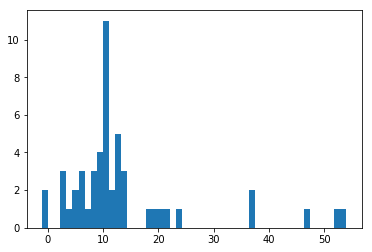

In [17]:
deltas = []
for state in state_data.State.unique():
    try:
        r_idx = np.where((state_data.State==state).values)[0][0]
        _, _, off1 = find_idx(r_idx, thres, 'case')
        _, _, off2 = find_idx(r_idx, thres, 'death')
        deltas.append(off2-off1)
    except:
        pass
    
plt.hist(deltas, bins=50)

In [22]:
state_data.iloc[r_idx, d0+offset:dinf]

3/13/2020_deaths    NaN
3/14/2020_deaths    NaN
3/15/2020_deaths    NaN
3/16/2020_deaths    NaN
3/17/2020_deaths    NaN
3/18/2020_deaths    NaN
3/19/2020_deaths    NaN
3/20/2020_deaths    NaN
3/21/2020_deaths    NaN
3/22/2020_deaths    NaN
3/23/2020_deaths    NaN
3/24/2020_deaths    NaN
total_deaths        NaN
MVNum               NaN
Name: 56, dtype: object

AK
AL
AR
AZ
CA
CO
CT
DC
DE
FL
GA
HI
IA
ID
IL
IN
KS
KY
LA
MA
MD
ME
MI
MN


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


MO
MS
MT
NC
ND
NE
NH
NJ
NM
NV
NY
OH
OK
OR
PA
RI


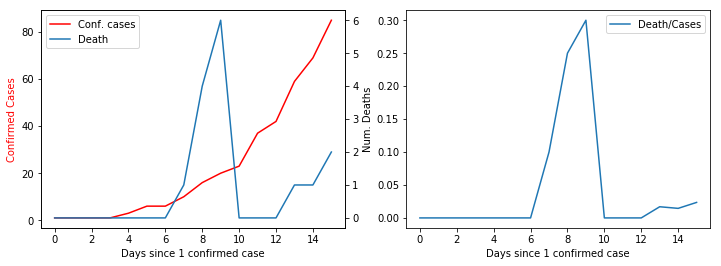

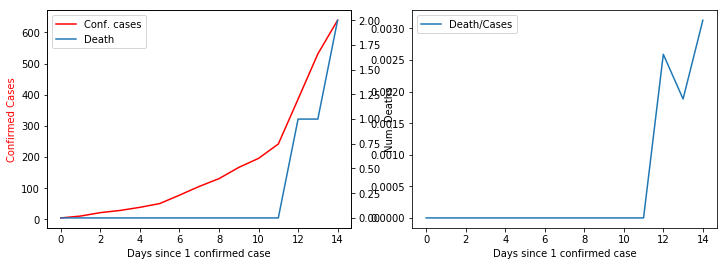

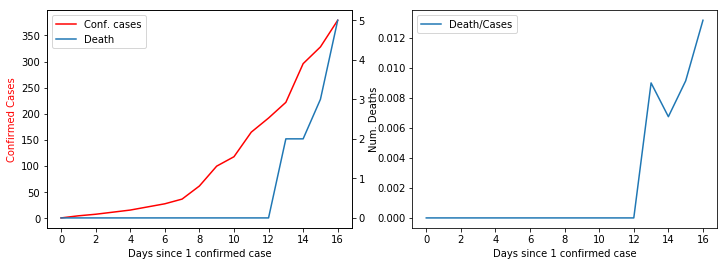

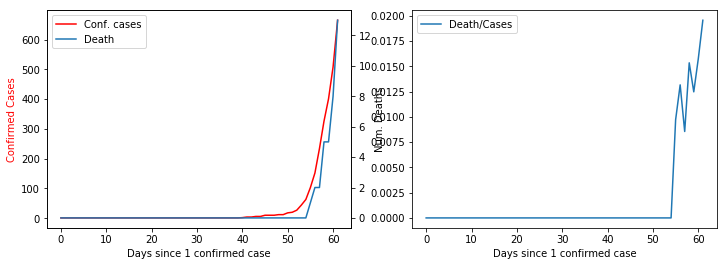

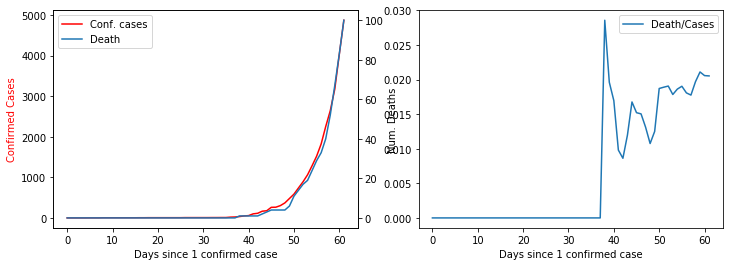

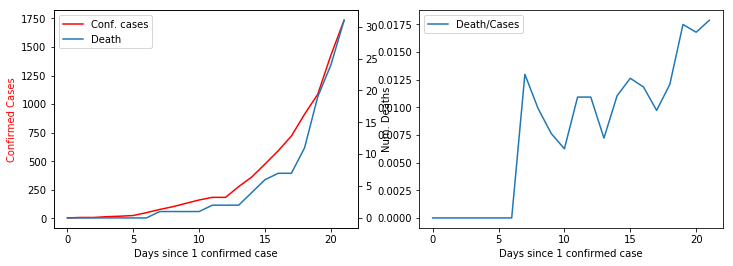

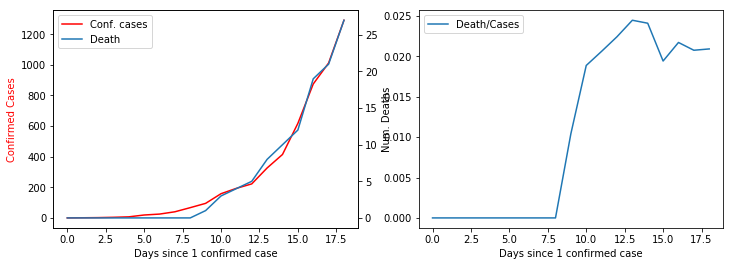

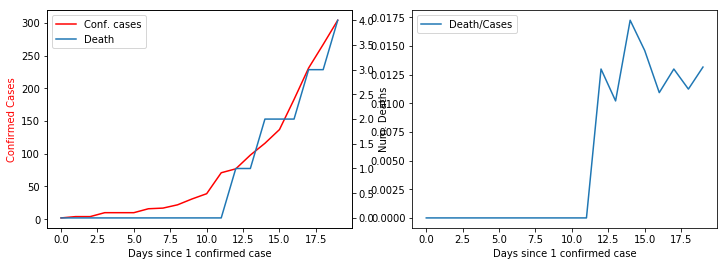

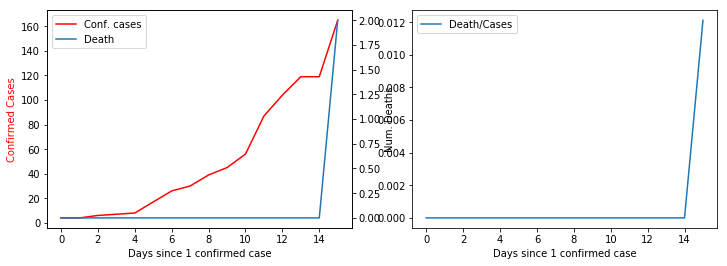

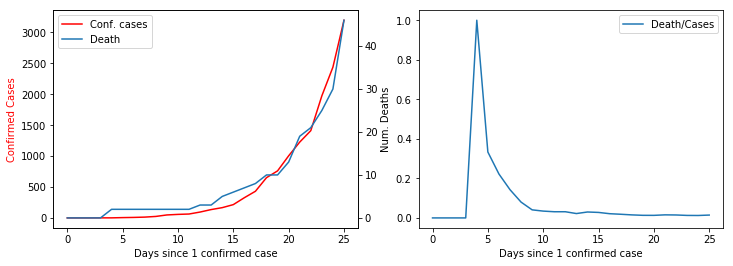

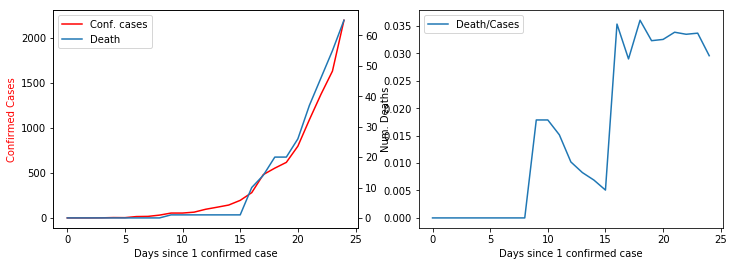

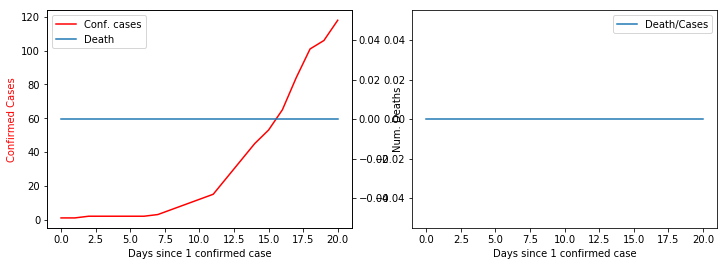

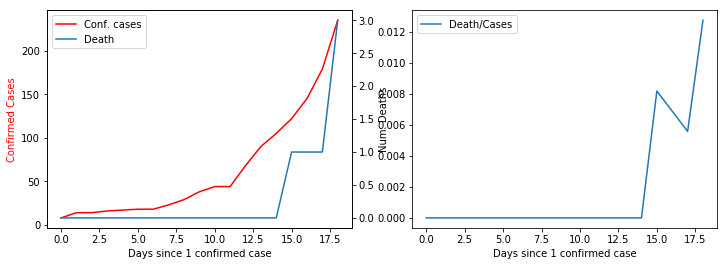

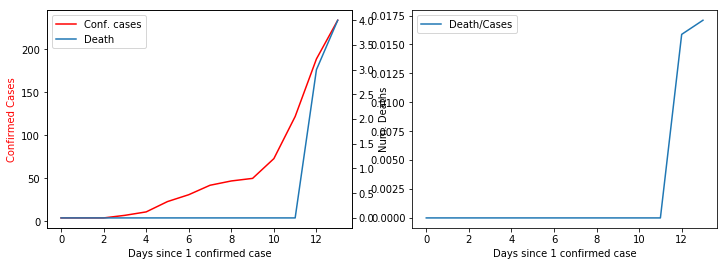

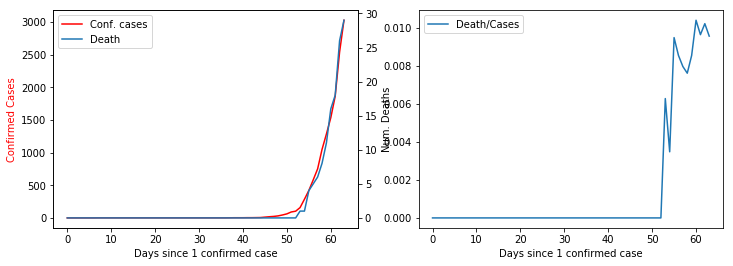

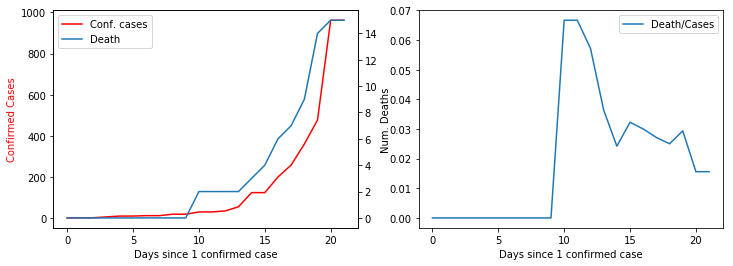

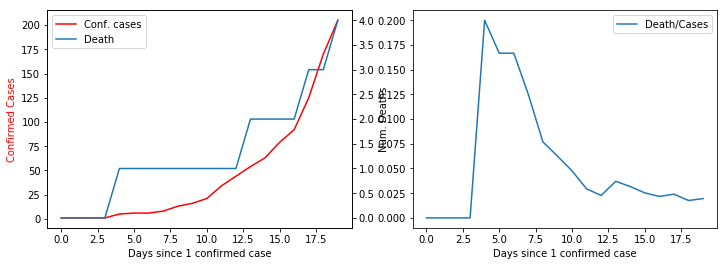

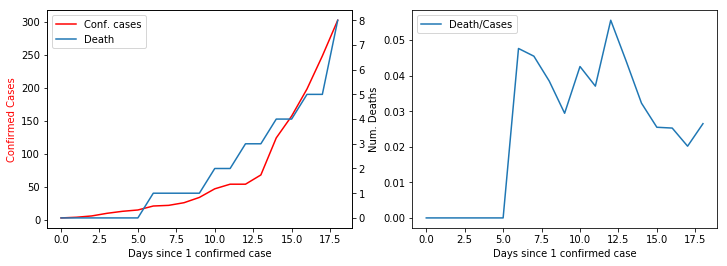

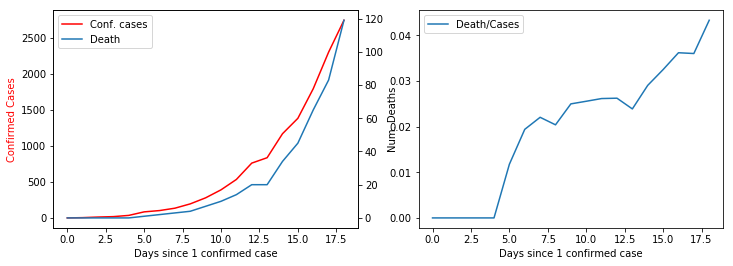

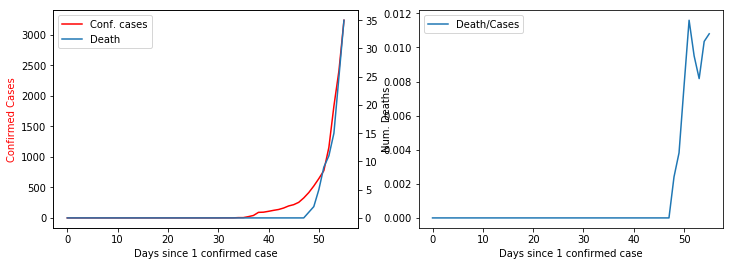

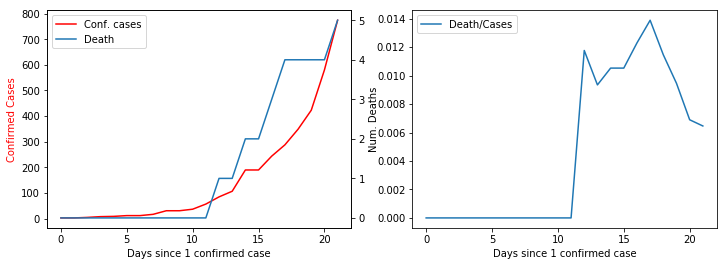

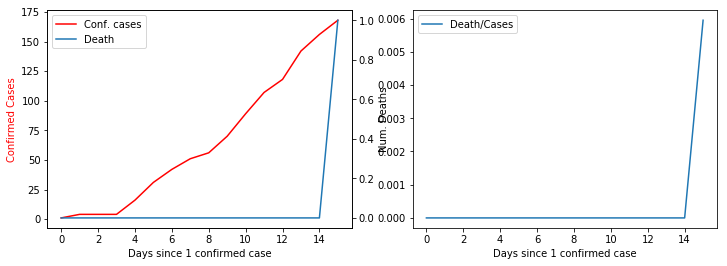

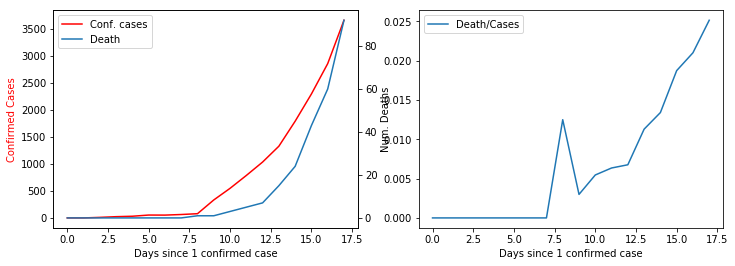

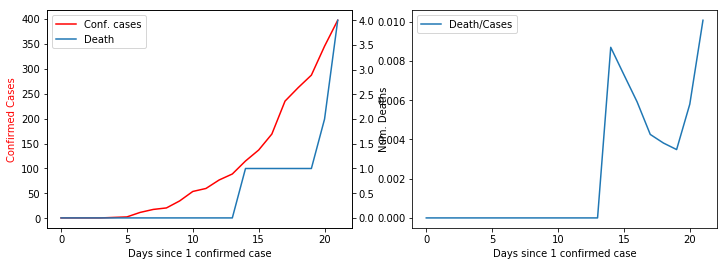

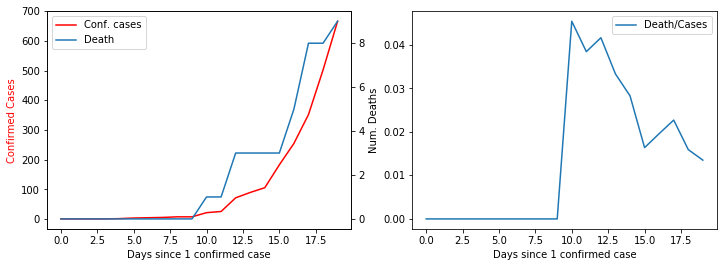

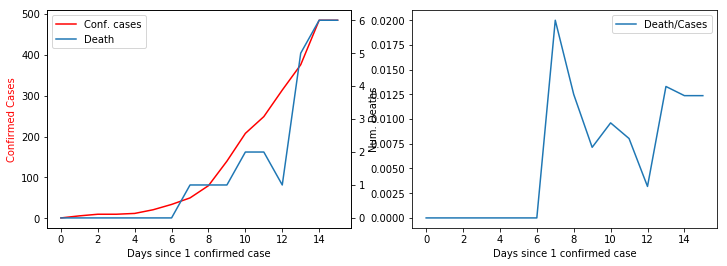

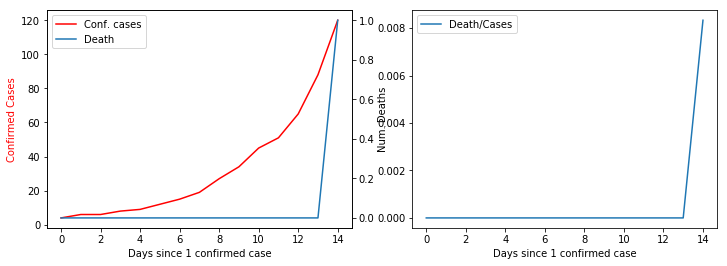

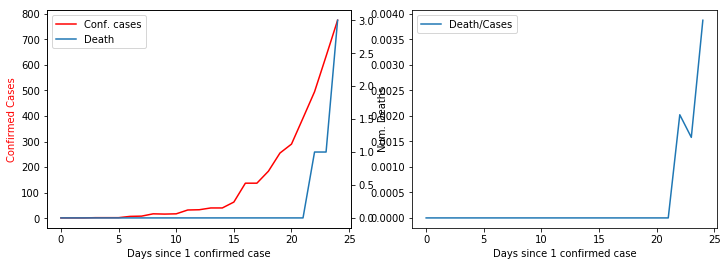

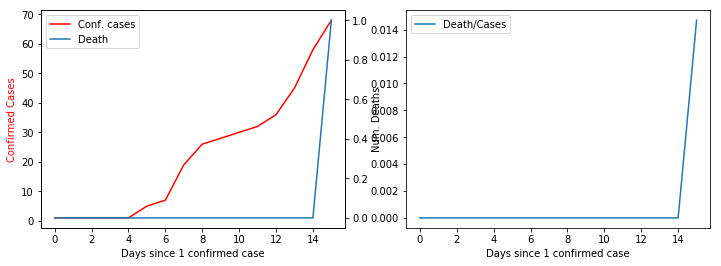

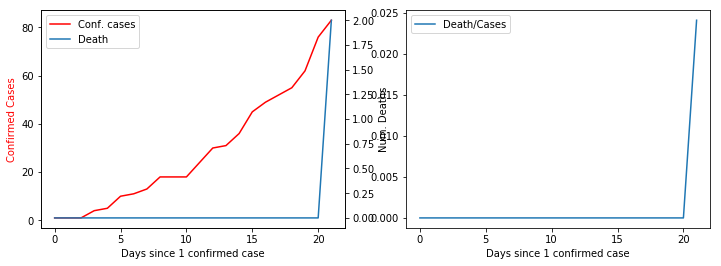

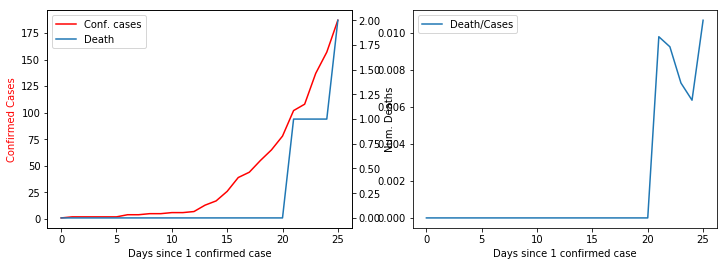

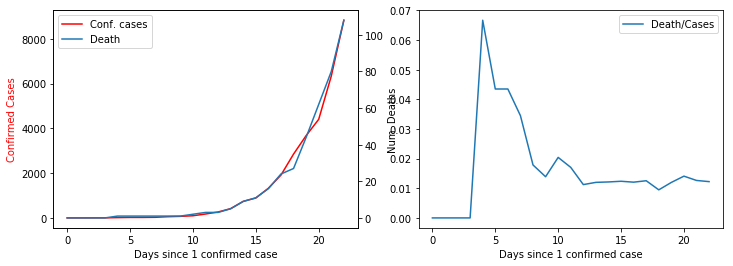

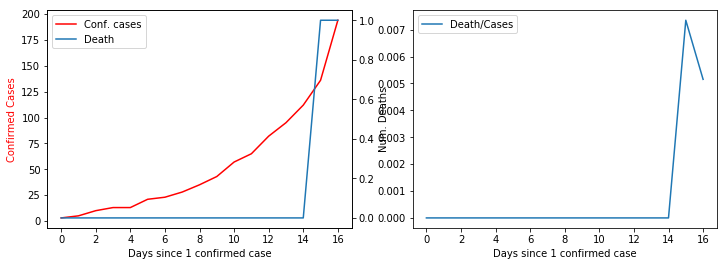

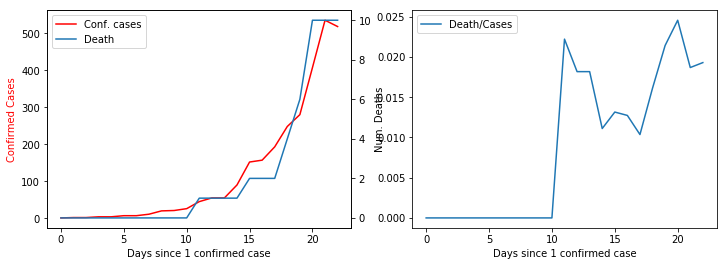

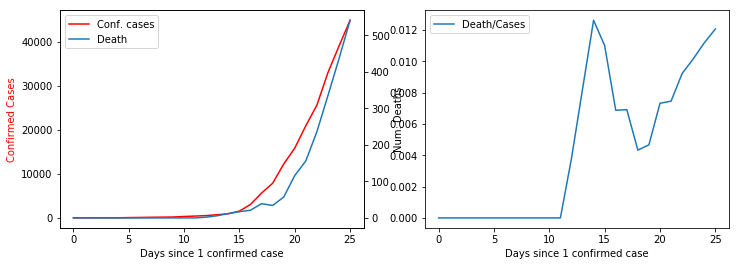

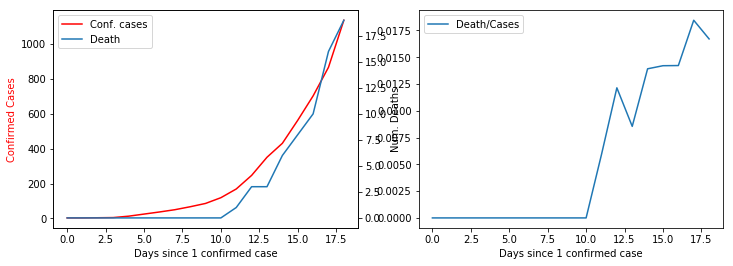

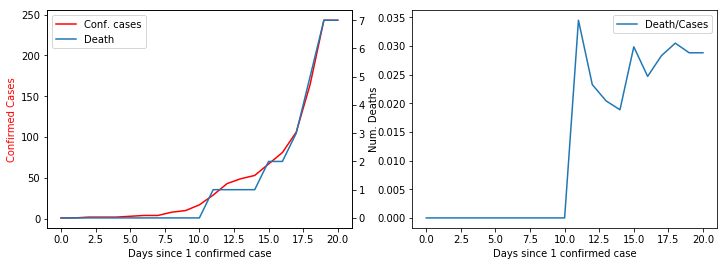

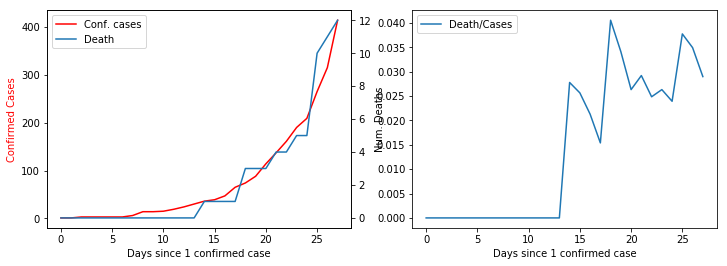

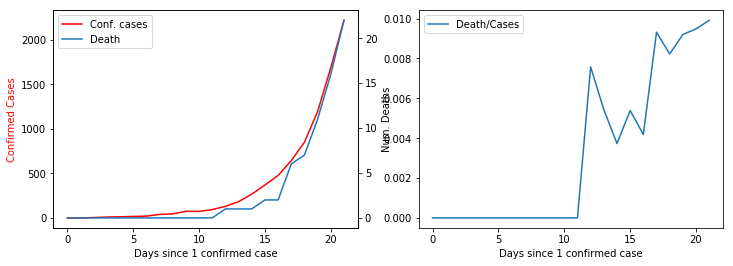

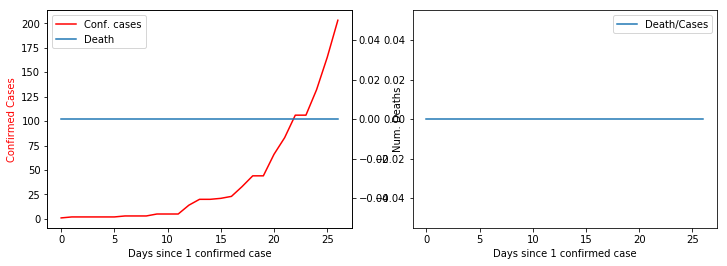

In [216]:
c0, cinf = 3, 69
d0, dinf = 69, 135
thres = 1
# for states 
for state in state_data.State.unique()[:40]:
    print(state)
    try:
        r_idx = np.where((state_data.State==state).values)[0][0]
        _, _, offset = find_idx(r_idx, thres, 'case')

        fig = plt.figure(figsize=[12, 4])
        ax = fig.add_subplot(121)
        ln1 = ax.plot(state_data.iloc[r_idx, c0+offset:cinf].values, label= 'Conf. cases', color='r')
        ax.set_ylabel('Confirmed Cases', color='r')
        ax2 = ax.twinx()
        ln2 = ax2.plot(state_data.iloc[r_idx, d0+offset:dinf].values, label= 'Death')
        ax2.set_ylabel('Num. Deaths')
        lns = ln1 + ln2
        labs = [l.get_label() for l in lns]
        ax.legend(lns, labs, loc=0)
        ax.set_xlabel('Days since %d confirmed case'%(thres))

        ax = fig.add_subplot(122)
        ax.plot(state_data.iloc[r_idx, d0+offset:dinf].values/state_data.iloc[r_idx, c0+offset:cinf].values , label= 'Death/Cases')
        ax.legend()
        ax.set_xlabel('Days since %d confirmed case'%(thres))
        title = str(state_data[state_data.State==state]["State Full"].values[0]) + ', tests = ' + str(state_data[state_data.State==state]["done_cases"].values[0])

        ax.tight_layout()
        print(state)
        ax.title(state)
        
        plt.show()
    except:
        pass

In [48]:
hospital_full[["Hospital Name", "Registered Nurses", "Total Employees"]].head(10)

,Hospital Name,Registered Nurses,Total Employees
0,Southeast Health Medical Center,521.0,2372.0
1,NaN,137.0,1181.0
2,NaN,415.0,971.0
3,NaN,44.0,157.0
4,NaN,42.0,99.0
5,NaN,90.0,478.0
6,St. Vincents East,267.0,944.0
7,NaN,121.0,358.0
8,NaN,312.0,691.0
9,Callahan Eye Foundation Hosp,40.0,227.0


## Ventilators

In [238]:
from sklearn.linear_model import LinearRegression

In [466]:
ventilators["ICU Beds"].sum(), hospital_full["ICU Beds"].sum()

(45275.0, 74564.0)

[0.87929258] -67.11143372651463
[0.07506873] 3.8023993218496095


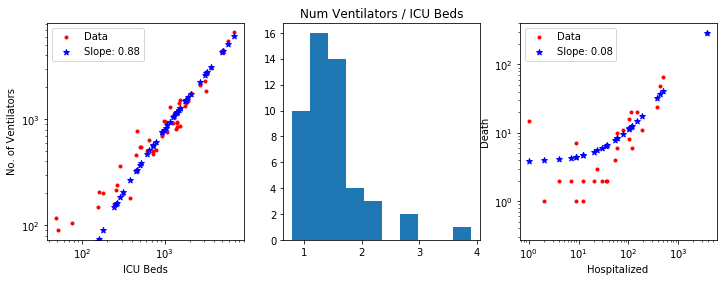

In [479]:
mydata = ventilators[['ICU Beds','MVNum']].dropna(how="any")
x = np.array(mydata['ICU Beds']).reshape(-1, 1) * hospital_full["ICU Beds"].sum() / mydata["ICU Beds"].sum()
y = mydata['MVNum']
model = LinearRegression()
model.fit(x, y)
print(model.coef_, model.intercept_)
plt.figure(figsize=[12, 4])
plt.subplot(131)
plt.scatter(x, y, color='r', marker='.', label='Data')
plt.scatter(x, model.predict(x), color='b', marker='*', label='Slope: %.2f'%model.coef_)
plt.legend()
plt.ylabel('No. of Ventilators')
plt.xlabel('ICU Beds')
plt.xscale('log')
plt.yscale('log')
plt.subplot(132)
mydata = ventilators[['ICU Beds','MVNum']].dropna(how="any")
plt.hist((mydata['MVNum']) /(mydata['ICU Beds']+1) )
plt.title('Num Ventilators / ICU Beds')
plt.subplot(133)
mydata = ventilators[['Hospitalized','Death']].dropna(how="any")
x = 1+np.array(mydata['Hospitalized']).reshape(-1, 1)
y = 1+mydata['Death']
model = LinearRegression()
model.fit(x, y)
print(model.coef_, model.intercept_)
plt.scatter(x, y, color='r', marker='.', label='Data')
plt.scatter(x, model.predict(x), color='b', marker='*', label='Slope: %.2f'%model.coef_)
plt.xlabel('Hospitalized')
plt.ylabel('Death')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

## ICU Rates

In [462]:
hospital_sam.keys()
hospital_sam["Type of Facility"].value_counts()

Short Term Acute Care    3906
Critical Access          1348
Psychiatric               753
Long Term                 425
Rehabilitation            382
Childrens                 177
Other                      27
Name: Type of Facility, dtype: int64

In [127]:
hospital_sam[(hospital_sam["Type of Facility"]=="Short Term Acute Care") & (hospital_sam["ICU Occupancy Rate"] > 0)]["ICU Occupancy Rate"].mean()

56.51882911273312

In [461]:
np.sum(hospital_sam["ICU Occupancy Rate"] * hospital_sam["ICU Beds"]) / np.sum(hospital_sam["ICU Beds"])

62.63349017823882

(array([1.274e+03, 5.110e+02, 9.230e+02, 8.820e+02, 2.950e+02, 1.400e+01,
        5.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.        ,  20.52054795,  41.0410959 ,  61.56164385,
         82.0821918 , 102.60273975, 123.1232877 , 143.64383565,
        164.1643836 , 184.68493155, 205.2054795 ]),
 <a list of 10 Patch objects>)

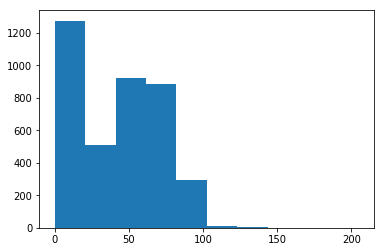

In [125]:
plt.hist(hospital_sam[hospital_sam["Type of Facility"]=="Short Term Acute Care"]["ICU Occupancy Rate"])

## ICU beds

In [312]:
bed_keys = []
for key in hospital_full.keys():
    if "Beds" in key:
        bed_keys.append(key)

In [319]:
hospital_full[hospital_full["City"] == "New York"]["County Name_y"]

3720    NEW YORK
3729    NEW YORK
3738         NaN
3756    NEW YORK
3757    NEW YORK
3767    NEW YORK
3783         NaN
3794    NEW YORK
3811    NEW YORK
3815    NEW YORK
3820    NEW YORK
3838    NEW YORK
3851    NEW YORK
3918    NEW YORK
3934    NEW YORK
3935    NEW YORK
Name: County Name_y, dtype: object

In [314]:
hospital_full[hospital_full["City"] == "New York"][bed_keys]

,Total Acute Beds,Total Staffed Beds,General Med/Surg Beds,ICU Beds,Med/Surg Beds,Coronary ICU Beds,Burn Intensive Care Beds,Surgical ICU Beds,Psych ICU Beds,Pediatric ICU Beds,...,Detox ICU Beds,Premature ICU Beds,Psychiatric Unit Beds,Rehabilitation Unit Beds,SNF Unit Beds,NF Unit Beds,Other Subprovider Unit Beds,Total Beds,Swing Beds SNF Days Total,Swing Beds NF Days Total
3720,1067.0,1161.0,943.0,75.0,943.0,14.0,0.0,0.0,0.0,0.0,...,0.0,0.0,44.0,50.0,0.0,0.0,0.0,1161.0,0.0,0.0
3729,633.0,783.0,515.0,57.0,515.0,26.0,0.0,0.0,0.0,0.0,...,0.0,0.0,110.0,40.0,0.0,0.0,0.0,783.0,0.0,0.0
3738,132.0,132.0,104.0,20.0,104.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,0.0,0.0
3756,16.0,16.0,16.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0
3757,2272.0,2650.0,1792.0,290.0,1792.0,44.0,0.0,0.0,0.0,0.0,...,0.0,0.0,340.0,38.0,0.0,0.0,0.0,2650.0,0.0,0.0
3767,422.0,449.0,348.0,24.0,348.0,22.0,0.0,0.0,0.0,0.0,...,0.0,0.0,27.0,0.0,0.0,0.0,0.0,449.0,0.0,0.0
3783,498.0,498.0,473.0,25.0,473.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,498.0,0.0,0.0
3794,485.0,554.0,449.0,28.0,449.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,69.0,0.0,0.0,0.0,0.0,554.0,0.0,0.0
3811,196.0,338.0,158.0,24.0,158.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,122.0,20.0,0.0,0.0,0.0,338.0,0.0,0.0
3815,527.0,912.0,445.0,45.0,445.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,339.0,46.0,0.0,0.0,0.0,912.0,0.0,0.0


## NY beds`

In [ ]:
nums = [248, 862, 163, 92, 0]
new_nums = np.zeros(5)
i = 0 
for c, k in zip(["KINGS", "NEW YORK", "BRONX", "QUEENS", "RICHMOND"], nums):
    new_nums[i] = hospital_full[(hospital_full["State"] == "NY") & (hospital_full["County Name_y"]==c)][ "ICU Beds"].sum()
    print(c, k, new_nums[i])
    i +=1
print(sum(nums), sum(new_nums))